In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('appreply.csv', index_col=0)
df.head()

,text,score
0,NaN,4
1,NaN,5
2,NaN,1
3,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
4,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5


In [3]:
df.shape

(1003, 2)

# 결측치

In [4]:
df.isna().sum()

text     3
score    0
dtype: int64

In [5]:
df.dropna(axis=0, inplace=True)
df.head()

,text,score
3,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
4,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
5,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
6,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
7,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3


In [6]:
df.isna().sum()

text     0
score    0
dtype: int64

# 이상치
댓글의 이상치 = 중복된 댓글 여러 개

In [7]:
df.shape

(1000, 2)

In [8]:
# 중복 제거
df = df.drop_duplicates(subset=['text'])

In [9]:
df.shape

(1000, 2)

# 인덱스 다시 설정

In [10]:
df.reset_index(drop=True).head()

,text,score
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3


# TF-IDF
긍부정(이진분류 형태로)

벡터로 바꾸기 위해서  
리스트 안에 한 텍스트의 명사 리스트가 들어있음  
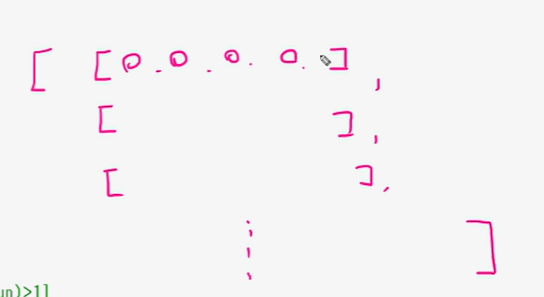

In [11]:
import re
from tqdm import tqdm
from konlpy.tag import Okt

noun_result = []

# 한글만 남기고 제거(특수문자와 이모티콘을 제거하기 위해)
for temp in tqdm(df['text']):
    temp_result = re.sub(r'[^ㄱ-ㅣ가-힣\s]','',temp)
    okt = Okt()
    # 명사 추출
    temp_nouns = okt.nouns(temp_result) # 하나의 텍스트에 대한 명사 리스트 형태
    temp_noins_result = [x for x in temp_nouns if len(x)>1] # 한 글자 이상만
    noun_result.append(temp_noins_result)

noun_result

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.66it/s]


[['배달',
  '민족',
  '주문',
  '리뷰',
  '자주',
  '참고',
  '편입',
  '한가지',
  '건의',
  '사항',
  '최신',
  '점순',
  '주문',
  '자하',
  '메뉴',
  '메뉴',
  '리뷰',
  '확인',
  '기능',
  '메뉴',
  '검색',
  '기능',
  '리뷰',
  '특정',
  '메뉴',
  '검색',
  '기능',
  '주문',
  '수가',
  '메뉴',
  '리뷰',
  '보기',
  '위해',
  '래그',
  '시간',
  '소요',
  '효율',
  '발생',
  '긍정',
  '검토',
  '주심'],
 ['주문',
  '과거',
  '목록',
  '검색',
  '기능',
  '분명',
  '가게',
  '기억',
  '찾기',
  '메뉴',
  '검색',
  '곱창',
  '치면',
  '과거',
  '곱창',
  '목록',
  '가게',
  '리뷰',
  '리뷰',
  '보기'],
 ['검색',
  '화면',
  '전체',
  '배달',
  '포장',
  '배달',
  '크롤',
  '아래',
  '크롤',
  '자꾸만',
  '왼쪽',
  '오른쪽',
  '전체',
  '포장',
  '정말',
  '검색',
  '배달',
  '포장',
  '마트',
  '하나',
  '선택',
  '좌우',
  '가끔',
  '크롤',
  '왼쪽',
  '전체',
  '가게'],
 ['배달',
  '정렬',
  '가게',
  '가장',
  '위로',
  '지역',
  '추가',
  '배달',
  '별도',
  '체크',
  '배달',
  '만원',
  '이상',
  '배달',
  '장난',
  '하나',
  '하나',
  '가격',
  '대별',
  '금액',
  '체크',
  '배달',
  '별도',
  '확인'],
 ['최근',
  '업데이트',
  '안드로이드',
  '사양',
  '정도',
  '배민',
  '어플',
  '실행',
  '업데이트',
  '하라',
  '업데이트',


+ **한글** 임베딩이 잘 되어 있는 모델이면 임베딩에 넣어도 됨

# tf-idf로 피처 만들기

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer # TF-iDF
from sklearn.metrics.pairwise import cosine_similarity # 코사인 유사도

In [13]:
tfidf_vect = TfidfVectorizer(tokenizer = lambda x:x, lowercase=False) # lambda x:x 텍스트를 토큰으로 분리하는 함수를 지정하는 파라미터. 그대로 넣겠다.
tfidf_vect.fit(noun_result) # TfidfVectorizer 객체
tfidf_matrix = tfidf_vect.transform(noun_result) # 명사만 추출한 리스트를 tfidf 벡터로 만듦
tfidf_matrix.toarray()

C:\deep\deep\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19910076, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07764362, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.06728922, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

tfidf_matrix -> 피처  
별점 -> 정답

In [14]:
# 단어 사전
tfidf_vect.vocabulary_

{'배달': 974,
 '민족': 911,
 '주문': 2193,
 '리뷰': 721,
 '자주': 1986,
 '참고': 2323,
 '편입': 2563,
 '한가지': 2654,
 '건의': 129,
 '사항': 1204,
 '최신': 2386,
 '점순': 2091,
 '자하': 1990,
 '메뉴': 811,
 '확인': 2758,
 '기능': 322,
 '검색': 130,
 '특정': 2529,
 '수가': 1328,
 '보기': 1039,
 '위해': 1806,
 '래그': 683,
 '시간': 1397,
 '소요': 1312,
 '효율': 2787,
 '발생': 950,
 '긍정': 317,
 '검토': 136,
 '주심': 2203,
 '과거': 217,
 '목록': 849,
 '분명': 1097,
 '가게': 0,
 '기억': 342,
 '찾기': 2331,
 '곱창': 202,
 '치면': 2420,
 '화면': 2751,
 '전체': 2072,
 '포장': 2581,
 '크롤': 2470,
 '아래': 1483,
 '자꾸만': 1970,
 '왼쪽': 1730,
 '오른쪽': 1691,
 '정말': 2111,
 '마트': 752,
 '하나': 2632,
 '선택': 1269,
 '좌우': 2181,
 '가끔': 10,
 '정렬': 2108,
 '가장': 33,
 '위로': 1800,
 '지역': 2258,
 '추가': 2393,
 '별도': 1031,
 '체크': 2360,
 '만원': 766,
 '이상': 1874,
 '장난': 2006,
 '가격': 1,
 '대별': 544,
 '금액': 313,
 '최근': 2379,
 '업데이트': 1612,
 '안드로이드': 1513,
 '사양': 1186,
 '정도': 2106,
 '배민': 977,
 '어플': 1594,
 '실행': 1457,
 '하라': 2640,
 '진행': 2291,
 '열기': 1666,
 '무한': 869,
 '반복': 943,
 '삭제': 1206,
 '설치': 127

In [15]:
len(tfidf_vect.vocabulary_)

2806

In [16]:
# shape
tfidf_matrix.shape

(1000, 2806)

# 정답 데이터 만들기

In [17]:
df.score.unique()

array([4, 5, 1, 2, 3], dtype=int64)

In [18]:
df['real_score'] = np.where(df['score']>=3,1,0) # 3보다 크면 1을 넣고 아니면 0

df.head(10)

,text,score,real_score
3,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4,1
4,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5,1
5,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1,0
6,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2,0
7,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3,1
8,찜매장 구분 좀 해주세요! 대체 언제쯤이면 개선될까요?? 독점이라 해이한건가요? 유...,2,0
9,"앱 실행시에 로그인 여부를 먼저 물어보고 비회원 이용을 선택할 경우, 혹은 나중에 ...",5,1
10,음식배달 후 시간이 지나면 리뷰를 요청하는 알림이 상단에 뜹니다. 리뷰를 적기위해 ...,3,1
11,"식사 한번에 최소 15000원 이상 주문, 거기에 배달료 3000기본이면 누가 시킵...",1,0
12,안 먹고 싶은 곳이나 먹고 난 후 만족하지 못한 곳을 차단할 수 있는 옵션이 생기면...,3,1


In [19]:
# 불균형 보기
df.real_score.value_counts()

real_score
0    583
1    417
Name: count, dtype: int64

In [19]:
한글만 남기고 정리->명사만 추출 -> 리스트에 넣어서(리스트 안에 리스트 구조)->벡터화->유사도 가장 높은 거
로지스틱 회귀

분류에서는 데이터 불균형이 생기면 성능이 잘 안나온다


In [21]:
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16998 stored elements and shape (1000, 2806)>

In [22]:
tfidf_matrix.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19910076, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07764362, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.06728922, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# train, test 분리

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix.toarray(), df['real_score'], test_size=0.2 , random_state=0, stratify=df['real_score'])

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

# 모델 만들고 학습

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

1 긍정적인 가중치 -1 부정적인 가중치

# 모델 가중치 보기

In [26]:
# 모델이 학습한 가중치
model.coef_

array([[ 1.10189569,  0.39319879,  0.0980676 , ..., -0.08949501,
         0.16593372, -0.02395003]])

In [28]:
# 2806
len(model.coef_[0])

2806

In [29]:
# 모델의 가중치가 가장 큰 것의 변수가 긍정적인 리뷰에 가장 큰 영향을 미쳤다

In [59]:
tfidf_vect.vocabulary_

{'배달': 974,
 '민족': 911,
 '주문': 2193,
 '리뷰': 721,
 '자주': 1986,
 '참고': 2323,
 '편입': 2563,
 '한가지': 2654,
 '건의': 129,
 '사항': 1204,
 '최신': 2386,
 '점순': 2091,
 '자하': 1990,
 '메뉴': 811,
 '확인': 2758,
 '기능': 322,
 '검색': 130,
 '특정': 2529,
 '수가': 1328,
 '보기': 1039,
 '위해': 1806,
 '래그': 683,
 '시간': 1397,
 '소요': 1312,
 '효율': 2787,
 '발생': 950,
 '긍정': 317,
 '검토': 136,
 '주심': 2203,
 '과거': 217,
 '목록': 849,
 '분명': 1097,
 '가게': 0,
 '기억': 342,
 '찾기': 2331,
 '곱창': 202,
 '치면': 2420,
 '화면': 2751,
 '전체': 2072,
 '포장': 2581,
 '크롤': 2470,
 '아래': 1483,
 '자꾸만': 1970,
 '왼쪽': 1730,
 '오른쪽': 1691,
 '정말': 2111,
 '마트': 752,
 '하나': 2632,
 '선택': 1269,
 '좌우': 2181,
 '가끔': 10,
 '정렬': 2108,
 '가장': 33,
 '위로': 1800,
 '지역': 2258,
 '추가': 2393,
 '별도': 1031,
 '체크': 2360,
 '만원': 766,
 '이상': 1874,
 '장난': 2006,
 '가격': 1,
 '대별': 544,
 '금액': 313,
 '최근': 2379,
 '업데이트': 1612,
 '안드로이드': 1513,
 '사양': 1186,
 '정도': 2106,
 '배민': 977,
 '어플': 1594,
 '실행': 1457,
 '하라': 2640,
 '진행': 2291,
 '열기': 1666,
 '무한': 869,
 '반복': 943,
 '삭제': 1206,
 '설치': 127

In [61]:
tfidf_vect.vocabulary_.items()

dict_items([('배달', 974), ('민족', 911), ('주문', 2193), ('리뷰', 721), ('자주', 1986), ('참고', 2323), ('편입', 2563), ('한가지', 2654), ('건의', 129), ('사항', 1204), ('최신', 2386), ('점순', 2091), ('자하', 1990), ('메뉴', 811), ('확인', 2758), ('기능', 322), ('검색', 130), ('특정', 2529), ('수가', 1328), ('보기', 1039), ('위해', 1806), ('래그', 683), ('시간', 1397), ('소요', 1312), ('효율', 2787), ('발생', 950), ('긍정', 317), ('검토', 136), ('주심', 2203), ('과거', 217), ('목록', 849), ('분명', 1097), ('가게', 0), ('기억', 342), ('찾기', 2331), ('곱창', 202), ('치면', 2420), ('화면', 2751), ('전체', 2072), ('포장', 2581), ('크롤', 2470), ('아래', 1483), ('자꾸만', 1970), ('왼쪽', 1730), ('오른쪽', 1691), ('정말', 2111), ('마트', 752), ('하나', 2632), ('선택', 1269), ('좌우', 2181), ('가끔', 10), ('정렬', 2108), ('가장', 33), ('위로', 1800), ('지역', 2258), ('추가', 2393), ('별도', 1031), ('체크', 2360), ('만원', 766), ('이상', 1874), ('장난', 2006), ('가격', 1), ('대별', 544), ('금액', 313), ('최근', 2379), ('업데이트', 1612), ('안드로이드', 1513), ('사양', 1186), ('정도', 2106), ('배민', 977), ('어플', 1594), ('실행', 1457), ('

In [62]:
sorted(tfidf_vect.vocabulary_.items())

[('가게', 0),
 ('가격', 1),
 ('가계', 2),
 ('가공', 3),
 ('가관', 4),
 ('가구', 5),
 ('가기', 6),
 ('가까스로', 7),
 ('가까윤', 8),
 ('가까이', 9),
 ('가끔', 10),
 ('가나', 11),
 ('가능', 12),
 ('가도', 13),
 ('가독성', 14),
 ('가뜩이나', 15),
 ('가라', 16),
 ('가량', 17),
 ('가령', 18),
 ('가로', 19),
 ('가르침', 20),
 ('가맹', 21),
 ('가면', 22),
 ('가방', 23),
 ('가성', 24),
 ('가안', 25),
 ('가야', 26),
 ('가요', 27),
 ('가운데', 28),
 ('가원', 29),
 ('가이드', 30),
 ('가입', 31),
 ('가입자', 32),
 ('가장', 33),
 ('가정', 34),
 ('가족', 35),
 ('가족사진', 36),
 ('가지', 37),
 ('가짐', 38),
 ('가짜', 39),
 ('가치', 40),
 ('각고', 41),
 ('각성', 42),
 ('각오', 43),
 ('각종', 44),
 ('간다', 45),
 ('간만', 46),
 ('간반', 47),
 ('간좀', 48),
 ('간지', 49),
 ('간짜장', 50),
 ('간편', 51),
 ('간혹', 52),
 ('갈리', 53),
 ('갈수', 54),
 ('갈수록', 55),
 ('감고', 56),
 ('감당', 57),
 ('감사', 58),
 ('감성', 59),
 ('감소', 60),
 ('감수', 61),
 ('감안', 62),
 ('감자', 63),
 ('감정', 64),
 ('갑니닼', 65),
 ('갑자기', 66),
 ('강국', 67),
 ('강요', 68),
 ('강원도', 69),
 ('강의', 70),
 ('강점', 71),
 ('강제', 72),
 ('강조', 73),
 ('강탈', 74),
 ('개념', 75),
 ('개

In [39]:
sorted_dict = dict(sorted(tfidf_vect.vocabulary_.items(), key=lambda item: item[1]))
sorted_dict

{'가게': 0,
 '가격': 1,
 '가계': 2,
 '가공': 3,
 '가관': 4,
 '가구': 5,
 '가기': 6,
 '가까스로': 7,
 '가까윤': 8,
 '가까이': 9,
 '가끔': 10,
 '가나': 11,
 '가능': 12,
 '가도': 13,
 '가독성': 14,
 '가뜩이나': 15,
 '가라': 16,
 '가량': 17,
 '가령': 18,
 '가로': 19,
 '가르침': 20,
 '가맹': 21,
 '가면': 22,
 '가방': 23,
 '가성': 24,
 '가안': 25,
 '가야': 26,
 '가요': 27,
 '가운데': 28,
 '가원': 29,
 '가이드': 30,
 '가입': 31,
 '가입자': 32,
 '가장': 33,
 '가정': 34,
 '가족': 35,
 '가족사진': 36,
 '가지': 37,
 '가짐': 38,
 '가짜': 39,
 '가치': 40,
 '각고': 41,
 '각성': 42,
 '각오': 43,
 '각종': 44,
 '간다': 45,
 '간만': 46,
 '간반': 47,
 '간좀': 48,
 '간지': 49,
 '간짜장': 50,
 '간편': 51,
 '간혹': 52,
 '갈리': 53,
 '갈수': 54,
 '갈수록': 55,
 '감고': 56,
 '감당': 57,
 '감사': 58,
 '감성': 59,
 '감소': 60,
 '감수': 61,
 '감안': 62,
 '감자': 63,
 '감정': 64,
 '갑니닼': 65,
 '갑자기': 66,
 '강국': 67,
 '강요': 68,
 '강원도': 69,
 '강의': 70,
 '강점': 71,
 '강제': 72,
 '강조': 73,
 '강탈': 74,
 '개념': 75,
 '개도': 76,
 '개돼지': 77,
 '개발': 78,
 '개발자': 79,
 '개별': 80,
 '개보': 81,
 '개불': 82,
 '개뿔': 83,
 '개선': 84,
 '개속': 85,
 '개수': 86,
 '개승': 87,
 '개악': 88,
 '개열': 89,


In [40]:
reversed_dict = {value: key for key, value in sorted_dict.items()}

print(reversed_dict)

{0: '가게', 1: '가격', 2: '가계', 3: '가공', 4: '가관', 5: '가구', 6: '가기', 7: '가까스로', 8: '가까윤', 9: '가까이', 10: '가끔', 11: '가나', 12: '가능', 13: '가도', 14: '가독성', 15: '가뜩이나', 16: '가라', 17: '가량', 18: '가령', 19: '가로', 20: '가르침', 21: '가맹', 22: '가면', 23: '가방', 24: '가성', 25: '가안', 26: '가야', 27: '가요', 28: '가운데', 29: '가원', 30: '가이드', 31: '가입', 32: '가입자', 33: '가장', 34: '가정', 35: '가족', 36: '가족사진', 37: '가지', 38: '가짐', 39: '가짜', 40: '가치', 41: '각고', 42: '각성', 43: '각오', 44: '각종', 45: '간다', 46: '간만', 47: '간반', 48: '간좀', 49: '간지', 50: '간짜장', 51: '간편', 52: '간혹', 53: '갈리', 54: '갈수', 55: '갈수록', 56: '감고', 57: '감당', 58: '감사', 59: '감성', 60: '감소', 61: '감수', 62: '감안', 63: '감자', 64: '감정', 65: '갑니닼', 66: '갑자기', 67: '강국', 68: '강요', 69: '강원도', 70: '강의', 71: '강점', 72: '강제', 73: '강조', 74: '강탈', 75: '개념', 76: '개도', 77: '개돼지', 78: '개발', 79: '개발자', 80: '개별', 81: '개보', 82: '개불', 83: '개뿔', 84: '개선', 85: '개속', 86: '개수', 87: '개승', 88: '개악', 89: '개열', 90: '개월', 91: '개인', 92: '개인정보', 93: '개인정보보호법', 94: '개판', 95: '개편', 96: '개후', 97: '객관', 98

In [45]:
result = np.argsort(model.coef_[0])
result

array([ 238, 2413,  172, ...,  721,  322,  811], dtype=int64)

In [46]:
# 앞에서 다섯 개(부정적)
model.coef_[0][result[:5]]

array([-1.41468036, -1.30328042, -1.27843395, -1.21416663, -1.20533398])

In [50]:
for i in np.argsort(model.coef_[0])[:10]: # 부정적 단어
  print(reversed_dict[i])

광고
취소
고객
시간
업데이트
로그인
센터
갈수록
배민
진짜


In [51]:
for i in np.argsort(model.coef_[0])[-10:]: # 긍정적 단어
  print(reversed_dict[i])

사항
사용
가게
자주
음식
다만
추가
리뷰
기능
메뉴


# 모델 평가

In [53]:
pred = model.predict(X_test) # 예측 결과
# model.scroe(pred, y_test)

In [54]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.72

In [55]:
from sklearn.metrics import f1_score

f1_score(y_test, pred)

0.5692307692307692

# 모델 추론

In [56]:
text = '메뉴가 많아서 좋아요'

def text_predict(text):
    data = re.sub(r'[^ㄱ-ㅣ가-힣\s]','',text)
    okt = Okt()
    nouns = okt.nouns(data)
    nouns = [x for x in nouns if len(x)>1]
    tfidf = tfidf_vect.transform([nouns]).toarray()
    return model.predict(tfidf)

text_predict(text)

array([1])

In [57]:
text = '업데이트 후 로그인이 안돼서 짜증나요'

text_predict(text)

array([0])